# Boosting Algerian Agricultural Company Profits

<font color="#fcd695"> The goal from this project is to predict whether investing money in a certain product familly in a certain periode of the year is beneficial for the company or not.In other words, we want to dectect how to boost the profit of Algerian Agricultural Company by buying the right products at the right time </strong></font>


## 1 Steps Of The Project:

### 1.1 Understand the Business/Research Context:

<font color="#ffe9c4">Gain a deep understanding of the business or research context. Understand the domain, business goals, and specific challenges.</font>

### 1.2 Data presentation:

<font color="#ffe9c4">
The dataset is csv file that contains a comprehensive dataset capturing various transactions within an agriculture company.The dataset has this features: 


 </font>

 | Column                  | Description                                              |
|-------------------------|----------------------------------------------------------|
| CleEffet                | Identifier for transactions.                             |
| Date                    | Date of the transaction.                                  |
| TypeEffet               | Type of transaction.                                      |
| FamilleArticle          | Family/category of the transaction product.              |
| CodeProduit             | Product code.                                            |
| ReferenceProduit        | Reference code for the product.                           |
| NLot                    | Lot number.                                              |
| Produit_Designation     | Original designation of the product of a transaction detail.|
| DetailEffet_Designation | Designation (sometimes different from Produit_Designation) of a transaction detail.|
| Quantite                | Quantity of the product.                                  |
| PrixAchat               | Purchase price.                                         |
| PrixUnitaireTTC         | Unit price including taxes.                              |
| DetailEffet_Marge       | Margin for the transaction detail.                        |
| Effet_Marge             | Margin for the transaction.                               |
| MontantHT               | Transaction amount excluding taxes.                      |
| Payement                | Payment amount.                                          |



<font color="#ffe9c4">
First in order to work with our dataset we should first import all the libreries that we will need in entry project and then get the dataset in pandas dataframe format 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("./Project_datamining_final_data_03_12_an1.csv")

<font color="#ffe9c4">
After that we should also know of what type are the attributes of the dataset

In [3]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261001 entries, 0 to 261000
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CleEffet                 261001 non-null  int64  
 1   Date                     261001 non-null  object 
 2   TypeEffet                261001 non-null  object 
 3   FamilleArticle           261001 non-null  object 
 4   Code Produit             160237 non-null  object 
 5   Reference Produit        135717 non-null  object 
 6   NLot                     228637 non-null  object 
 7   Produit_Designation      261001 non-null  object 
 8   DetailEffet_Designation  261001 non-null  object 
 9   Quantite                 261001 non-null  float64
 10  PrixAchat                261001 non-null  object 
 11  PrixUnitaireTTC          261001 non-null  object 
 12  DetailEffet_Marge        261001 non-null  object 
 13  Effet_Marge              261001 non-null  object 
 14  Mont

we want to know the differente types of the product familly we have


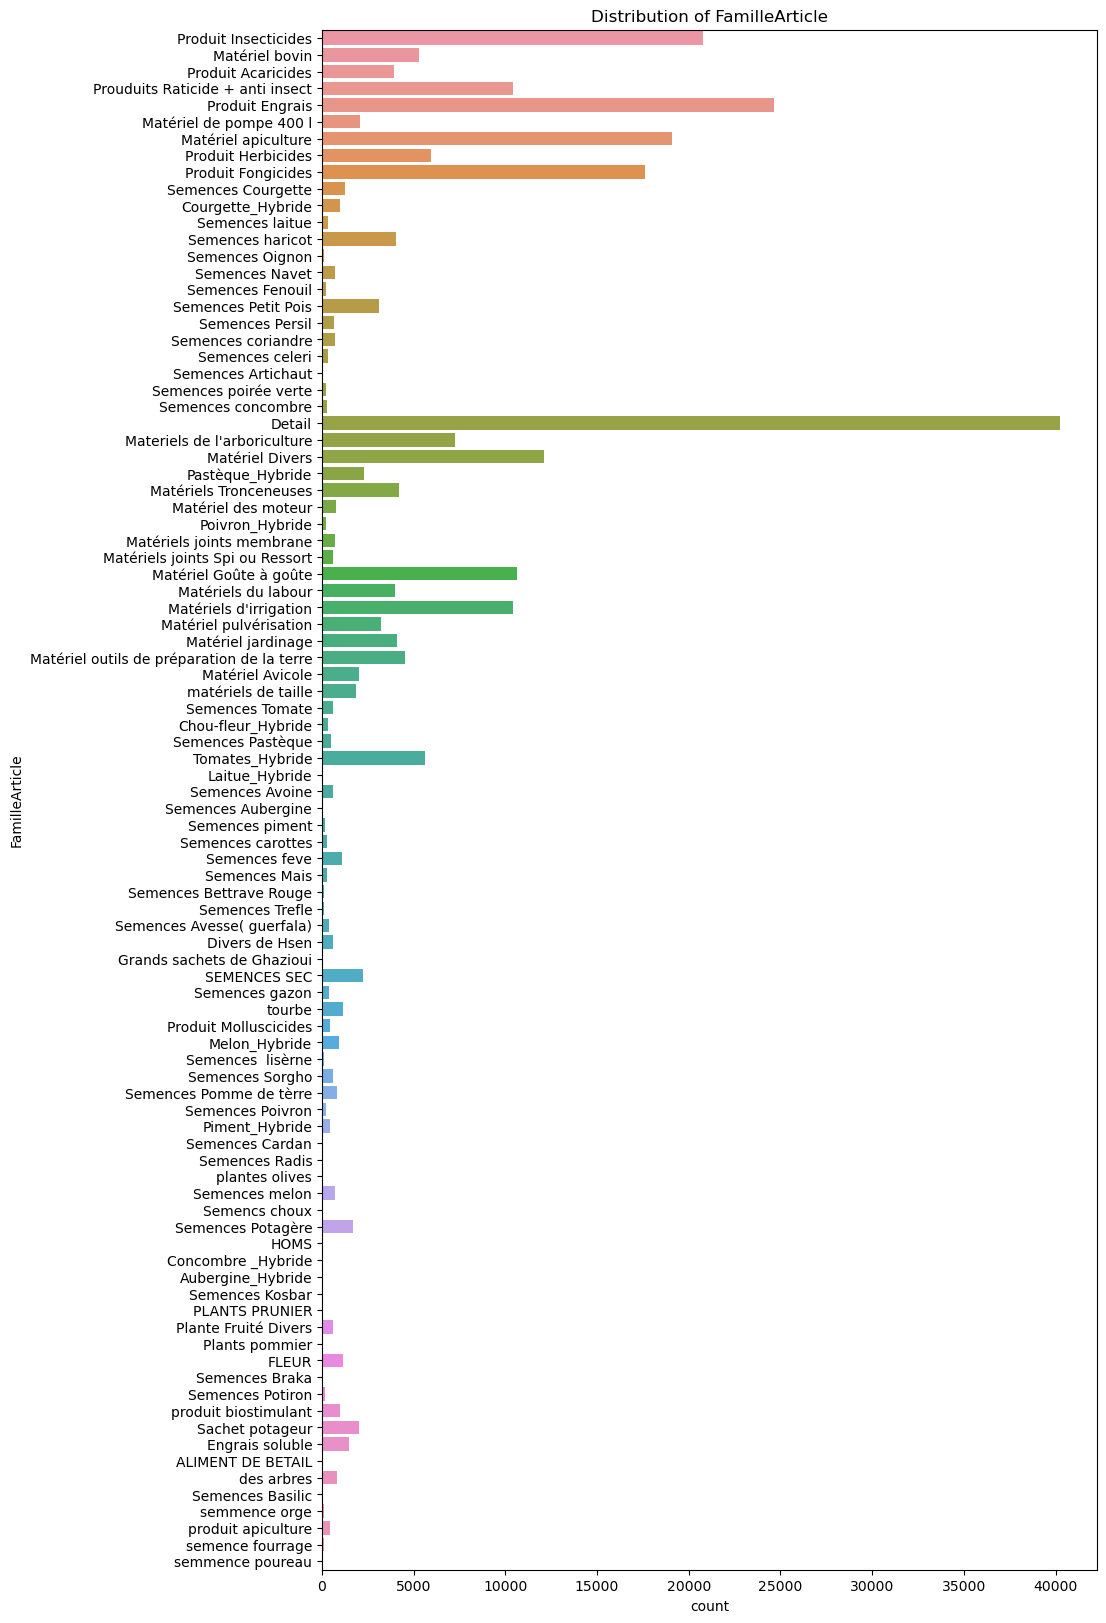

In [4]:
# Count plot for 'FamilleArticle'
plt.figure(figsize=(10, 20))
sns.countplot(y='FamilleArticle', data=data)
plt.title('Distribution of FamilleArticle')
plt.show()



### 1.3 Data Cleaning and Preprocessing:

<font color="#ffe9c4">At this stages we should improve the quality of our data, and make it easy to use and work with by doing the following:</font>

#### 1.3.1 Data Cleanning:
Clean the raw data by fixing attributes types,handling missing values, outliers, and inconsistencies.

In [5]:
# Data Types Assingment
data['CleEffet'] = data['CleEffet'].astype(str)
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')
data['TypeEffet'] = data['TypeEffet'].astype(str)
data['FamilleArticle'] = data['FamilleArticle'].astype(str)
data['Code Produit'] = data['Code Produit'].astype(str)
data['Reference Produit'] = data['Reference Produit'].astype(str)
data['NLot'] = data['NLot'].astype(str)
data['Produit_Designation'] = data['Produit_Designation'].astype(str)
data['DetailEffet_Designation'] = data['DetailEffet_Designation'].astype(str)
data['Code Produit'] = data['Code Produit'].astype(str)

data['PrixAchat'] = data['PrixAchat'].str.replace(',', '').astype('float64')
data['PrixUnitaireTTC'] = data['PrixUnitaireTTC'].str.replace(',', '').astype('float64')
data['DetailEffet_Marge'] = data['DetailEffet_Marge'].str.replace(',', '').astype('float64')
data['Effet_Marge'] = data['Effet_Marge'].str.replace(',', '').astype('float64')
data['MontantHT'] = data['MontantHT'].str.replace(',', '').astype('float64')
data['Payement'] = data['Payement'].str.replace(',', '').astype('float64')

In the rest of our work we will be interested only with sellings so we need to know we type of bills we will work with

TypeEffet
Bon de livraison    223143
Bon de réception     18098
Bon de sortie        11451
Bon d'entrée          8309
Name: count, dtype: int64


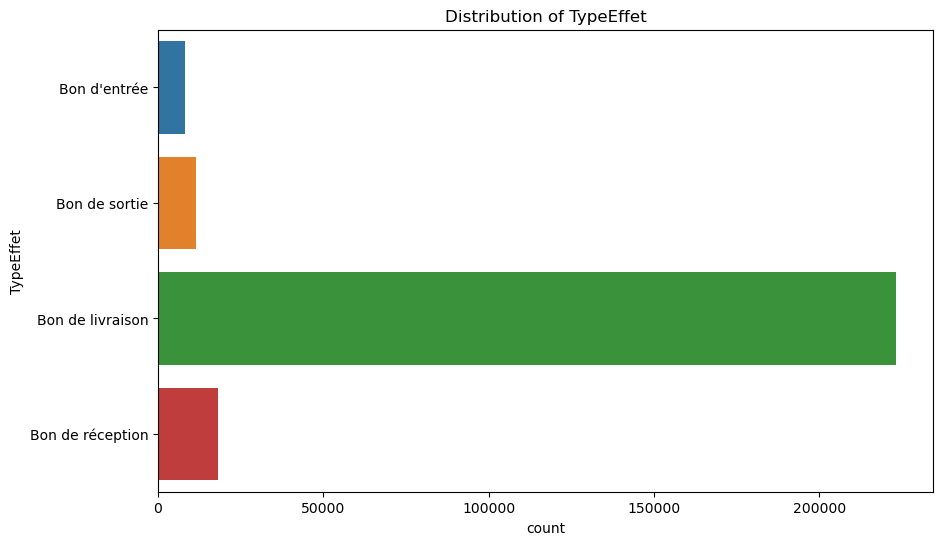

In [6]:
print(data['TypeEffet'].value_counts())
# Count plot for 'TypeEffet'
plt.figure(figsize=(10, 6))
sns.countplot(y='TypeEffet', data=data)
plt.title('Distribution of TypeEffet')
plt.show()

In [7]:
data['TypeEffet'].value_counts()

TypeEffet
Bon de livraison    223143
Bon de réception     18098
Bon de sortie        11451
Bon d'entrée          8309
Name: count, dtype: int64

In [8]:
data.query('(PrixUnitaireTTC - PrixAchat) * Quantite != DetailEffet_Marge and TypeEffet == "Bon de livraison"' )

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement
623,340,2012-09-03,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,1.0,126.0,300.0,299.00,299.00,300.0,0.0
624,341,2012-09-03,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,150.0,126.0,1.0,0.00,0.00,150.0,0.0
2166,540,2012-09-08,Bon de livraison,Matériels Tronceneuses,30036,30000,no lot,Produit_Anon_465,Detail_Anon_480,1.0,180.0,250.0,249.00,249.00,250.0,250.0
2172,546,2012-09-08,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,6.0,126.0,250.0,1494.00,1494.00,1500.0,1500.0
2173,547,2012-09-08,Bon de livraison,Produit Insecticides,0305-045,0305,111008,Produit_Anon_27,Detail_Anon_27,1.0,1200.0,500.0,-9515.13,-18498.00,1550.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260989,68345,2022-07-27,Bon de livraison,Produit Engrais,00067,nan,1330328,Produit_Anon_6772,Detail_Anon_10819,1.0,9075.0,11000.0,1906.21,9758.58,101765.0,0.0
260990,68345,2022-07-27,Bon de livraison,Semences haricot,nan,nan,G2201129,Produit_Anon_2228,Detail_Anon_6197,3.0,11000.0,11500.0,1120.30,9758.58,101765.0,0.0
260991,68345,2022-07-27,Bon de livraison,Produit Insecticides,0305-039,0305,l211006,Produit_Anon_2,Detail_Anon_11982,1.0,2400.0,2900.0,514.24,9758.58,101765.0,0.0
260992,68345,2022-07-27,Bon de livraison,Courgette_Hybride,nan,nan,GS834-30-322,Produit_Anon_7114,Detail_Anon_11731,5.0,4300.0,4500.0,752.37,9758.58,101765.0,0.0


So we will be interested in with the TypeEffet='Bon de livraison'

In [9]:
dataLivraison = data[data['TypeEffet'] == 'Bon de livraison']

#### 1.3.2 Data Preprocessing:
Preprocess the data to transform it into a suitable format (type) for analysis since most of our data are of type object. This step include also normalization, standardization, and encoding categorical variables and also transforming the attributes names and content to english since they are written in french.

### 1.4 Exploratory Data Analysis (EDA):

<font color="#ffe9c4">Explore the data to gain insights and an initial understanding of its characteristics. This may involve the use of statistical summaries, visualizations, and other exploratory techniques.</font>

first we want to see the sum profit(DetailEffet_Marge) of each product familly from 2012 unitl 2020 in each month so we can know which product familly has the best profit in a certain month 

In [10]:
# Extract month and year from the 'Date' column
dataLivraison['Month'] = dataLivraison['Date'].dt.month

# Group by 'FamilleArticle' and 'Month' and sum the 'DetailEffet_Marge' for each group
grouped = dataLivraison.groupby(['FamilleArticle', 'Month'])['DetailEffet_Marge'].sum().reset_index()

# Splitting categories into groups of 10 for plotting
categories = grouped['FamilleArticle'].unique()

for i in range(len(categories) // 10 + 1):
    plt.figure(figsize=(10, 6))
    
    for j in range(i * 10, min((i + 1) * 10, len(categories))):
        plt.title(f'Categories {i * 10 + 1} to {min((i + 1) * 10, len(categories))}')
        
        category = categories[j]
        category_data = grouped[grouped['FamilleArticle'] == category]
        plt.plot(category_data['Month'], category_data['DetailEffet_Marge'], label=category)
        
        plt.xlabel('Months')
        plt.ylabel('DetailEffet_Marge')
    
    plt.legend()
    plt.tight_layout()
    
    # Save each set of 10 categories as an individual image file
    plt.savefig(f'plot_categories_{i * 10 + 1}_to_{min((i + 1) * 10, len(categories))}.png')
    plt.close()  # Close the current figure to prevent overlapping plots

C:\Users\pc\AppData\Local\Temp\ipykernel_1648\1784903381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLivraison['Month'] = dataLivraison['Date'].dt.month


And to make things clearer we will put for each month of the year a table that contains the  sum profit of each product familly and its purcentage from the whole profit of the month and rank them decreasingly

In [11]:
# Define a custom function to sort the DataFrame within each group
def sort_by_detail_marge(group):
    return group.sort_values(by='DetailEffet_Marge', ascending=False)

# Apply the custom function to each group within each month
sorted_grouped = grouped.groupby('Month', group_keys=False).apply(sort_by_detail_marge)

# Path to save PDF files
pdf_path = 'tables'

# Iterate over each month
for month, month_group in sorted_grouped.groupby('Month'):
    # Calculate the percentage column and round to two decimal places
    month_group['Percentage'] = (month_group['DetailEffet_Marge'] / month_group['DetailEffet_Marge'].sum() * 100).round(2)

    # Round 'DetailEffet_Marge' to two decimal places
    month_group['DetailEffet_Marge'] = month_group['DetailEffet_Marge'].round(2)

    # Create a table using matplotlib
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    # Include 'Percentage' column in the table
    table_data = month_group[['FamilleArticle', 'DetailEffet_Marge', 'Percentage']].values
    col_labels = ['FamilleArticle', 'DetailEffet_Marge', 'Percentage']
    ax.table(cellText=table_data,
             colLabels=col_labels,
             cellLoc='center', loc='center')

    # Save the table as a PDF file
    pdf_filename = f'{pdf_path}/table_{month}.pdf'
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.close()

In the generated tables we found out that some product familly have an negative total profit as example "Courgette_Hybride" <strong>(we should move it to cleaning i think)</strong>

In [12]:
dataLivraison[dataLivraison['FamilleArticle'] == 'Courgette_Hybride']
dataLivraison.query('FamilleArticle == "Courgette_Hybride" and Effet_Marge < 0')

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month
46409,28007,2014-08-05,Bon de livraison,Courgette_Hybride,0204-013,0204,11585885,Produit_Anon_1470,Detail_Anon_5463,1.0,3200.00,3550.0,2.790900e+02,-2.604944e+04,133290.0,132504.99,8
46423,28007,2014-08-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026120101T0,Produit_Anon_1469,Detail_Anon_3874,1.0,5800.00,6200.0,3.891600e+02,-2.604944e+04,133290.0,132504.99,8
54626,29942,2015-02-07,Bon de livraison,Courgette_Hybride,0104-011,0104,4 A 0351/5,Produit_Anon_157,Detail_Anon_157,1.0,2400.00,2900.0,-4.000000e+10,-3.999994e+10,501944.0,501409.00,2
56270,30194,2015-03-12,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,2.0,6400.00,7000.0,1.122270e+03,-1.749042e+05,502490.0,499699.99,3
56836,30245,2015-03-19,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,1.0,6400.00,7300.0,8.263000e+02,-8.395600e+02,594270.0,588270.00,3
56837,30245,2015-03-19,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,1.0,6400.00,7100.0,6.283200e+02,-8.395600e+02,594270.0,588270.00,3
61230,30949,2015-05-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026110101T1,Produit_Anon_1469,Detail_Anon_3874,1.0,5750.00,5062.5,-7.118300e+02,-2.847320e+03,20250.0,0.00,5
61231,30949,2015-05-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026120101T0,Produit_Anon_1469,Detail_Anon_3874,3.0,5800.00,5062.5,-2.135490e+03,-2.847320e+03,20250.0,0.00,5
206596,58231,2020-08-17,Bon de livraison,Courgette_Hybride,0204-012,0204,NO5814180201T0,Produit_Anon_1469,Detail_Anon_9836,2.0,8849.99,9500.0,2.935000e+03,-2.065000e+03,89000.0,0.00,8
207908,58464,2020-09-16,Bon de livraison,Courgette_Hybride,0204-012,0204,NO5814180201T0,Produit_Anon_1469,Detail_Anon_9836,2.0,8849.99,9000.0,1.900200e+03,-7.115156e+04,124140.0,0.00,9


In [13]:
correct_marge=data.query('(PrixUnitaireTTC - PrixAchat)  == DetailEffet_Marge/Quantite and TypeEffet == "Bon de livraison"' )
correct_marge['unitMargin'] = correct_marge['DetailEffet_Marge'] / correct_marge['Quantite']

C:\Users\pc\AppData\Local\Temp\ipykernel_1648\2956176491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_marge['unitMargin'] = correct_marge['DetailEffet_Marge'] / correct_marge['Quantite']


In [14]:
# missing values
missing_values = correct_marge.isnull().sum()
print(missing_values)


CleEffet                   0
Date                       0
TypeEffet                  0
FamilleArticle             0
Code Produit               0
Reference Produit          0
NLot                       0
Produit_Designation        0
DetailEffet_Designation    0
Quantite                   0
PrixAchat                  0
PrixUnitaireTTC            0
DetailEffet_Marge          0
Effet_Marge                0
MontantHT                  0
Payement                   0
unitMargin                 0
dtype: int64


So we don't have messing values lets see if there is duplicate values

In [15]:
# duplicate values
duplicate_rows = correct_marge[correct_marge.duplicated()]
print(duplicate_rows)

       CleEffet       Date         TypeEffet   FamilleArticle Code Produit  \
32207     21206 2014-02-08  Bon de livraison  Tomates_Hybride    512881010   
164567    49921 2019-02-06  Bon de livraison           Detail          nan   
255826    67243 2022-05-25  Bon de livraison           Detail          nan   

       Reference Produit            NLot Produit_Designation  \
32207     F14016100202T0  F14016110101T1   Produit_Anon_1423   
164567               nan          no lot   Produit_Anon_5626   
255826               nan          no lot   Produit_Anon_5626   

       DetailEffet_Designation  Quantite  PrixAchat  PrixUnitaireTTC  \
32207         Detail_Anon_2876       2.0     3600.0           4000.0   
164567        Detail_Anon_7953       1.0      500.0            500.0   
255826        Detail_Anon_7953       1.0      500.0            250.0   

        DetailEffet_Marge  Effet_Marge  MontantHT  Payement  unitMargin  
32207               800.0      2217.42    27800.0   27800.0       4

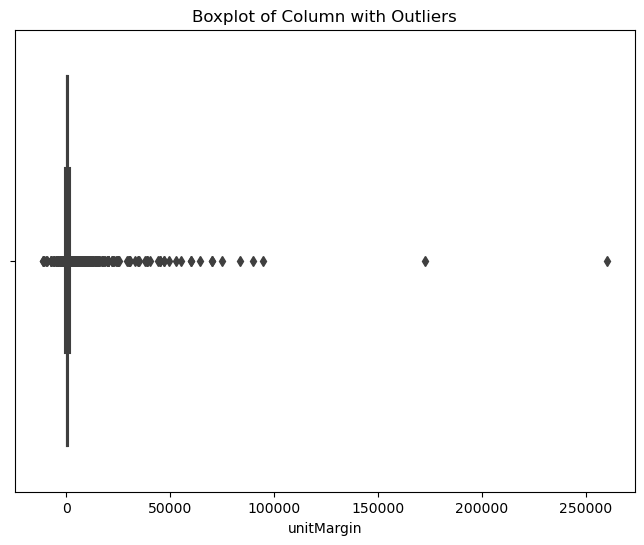

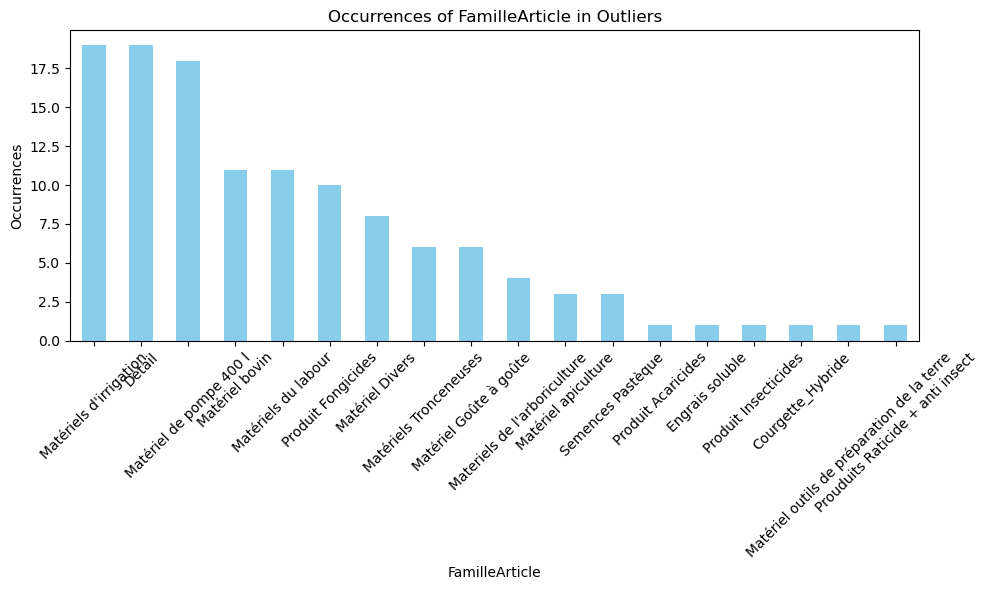

In [16]:
# outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=correct_marge['unitMargin'])
plt.title('Boxplot of Column with Outliers')
plt.show()

# Detect outliers using z-score method and display them
from scipy import stats
z_scores = stats.zscore(correct_marge['unitMargin'])
threshold = 3
outliers_indices = correct_marge.index[(z_scores > threshold)]
outliers = correct_marge.loc[outliers_indices, ['FamilleArticle', 'DetailEffet_Marge', 'Quantite', 'unitMargin']]
outliers_sorted = outliers.sort_values(by='unitMargin', ascending=False)

article_counts = outliers_sorted['FamilleArticle'].value_counts()

# Plotting histogram of 'FamilleArticle' occurrences
plt.figure(figsize=(10, 6))
article_counts.plot(kind='bar', color='skyblue')
plt.title('Occurrences of FamilleArticle in Outliers')
plt.xlabel('FamilleArticle')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
correct_marge.describe()

,Date,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,unitMargin
count,22312,22312.000000,22312.000000,22312.000000,22312.000000,22312.000000,2.231200e+04,2.231200e+04,22312.000000
mean,2017-08-19 08:32:38.121190400,13.341101,4012.585261,4777.003858,2339.053531,7980.931328,5.719730e+04,2.096129e+04,764.418597
min,2010-03-01 00:00:00,0.010000,1.000000,0.000000,-102000.000000,-873326.680000,0.000000e+00,0.000000e+00,-11250.000000
25%,2014-05-31 00:00:00,1.000000,750.000000,950.000000,300.000000,1200.000000,7.500000e+03,0.000000e+00,150.000000
50%,2018-03-03 00:00:00,2.000000,1800.000000,2250.000000,800.000000,3679.880000,2.300000e+04,0.000000e+00,350.000000
75%,2020-03-29 00:00:00,5.000000,4500.000000,5200.000000,2050.000000,9000.000000,6.247000e+04,1.121000e+04,731.250000
max,2022-07-28 00:00:00,16000.000000,378000.000000,472500.000000,521885.000000,554400.260000,4.419000e+06,3.600000e+06,260000.000000
std,NaN,169.057079,10237.463935,12377.668518,9598.520677,19196.725732,1.217756e+05,7.501396e+04,3190.748007


In [18]:
# some examples to see
correct_marge.loc[correct_marge['Quantite'] == 0.010000]
correct_marge.loc[correct_marge['DetailEffet_Marge'] == -102000]
correct_marge.loc[correct_marge['MontantHT'] == 4.419000e+06]
correct_marge.loc[correct_marge['Payement'] == 3.600000e+06]
dataLivraison.loc[dataLivraison['CleEffet'] == '8460']

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month
12105,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,11615685,0203,10526334,Produit_Anon_393,Detail_Anon_1439,40.0,5400.0,5400.0,0.0,-73932.1,4419000.0,0.0,3
12106,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,0203-007,0203,3008595,Produit_Anon_394,Detail_Anon_2476,10.0,6750.0,4500.0,6017.9,-73932.1,4419000.0,0.0,3
12107,8460,2013-03-13,Bon de livraison,tourbe,12008,12000,no lot,Produit_Anon_1690,Detail_Anon_1669,100.0,1080.0,1080.0,10050.0,-73932.1,4419000.0,0.0,3
12108,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,0203-038,0203,10678493,Produit_Anon_2086,Detail_Anon_2303,900.0,4600.0,4500.0,-90000.0,-73932.1,4419000.0,0.0,3


In [19]:
averagebyfamille=correct_marge.groupby('FamilleArticle')['unitMargin'].mean().reset_index()
averagebyfamille_sorted = averagebyfamille.sort_values('unitMargin', ascending=False)
averagebyfamille_sorted

,FamilleArticle,unitMargin
16,Matériel de pompe 400 l,2977.002299
15,Matériel bovin,2844.457251
41,Semences lisèrne,2539.583333
22,Matériels d'irrigation,1906.696171
23,Matériels du labour,1616.901890
...,...,...
9,HOMS,19.166667
58,Semences Pomme de tèrre,8.657895
83,semmence orge,6.000000
79,plantes olives,0.000000


In [20]:
fixedData = data[data['TypeEffet'] == 'Bon de livraison']
# Multiply 'averagebyfamille' by 'quantity' and override 'Detaileffetmarge'
fixedData['DetailEffet_Marge'] = fixedData['FamilleArticle'].map(averagebyfamille.set_index('FamilleArticle')['unitMargin']) * fixedData['Quantite']
fixedData


C:\Users\pc\AppData\Local\Temp\ipykernel_1648\190743476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixedData['DetailEffet_Marge'] = fixedData['FamilleArticle'].map(averagebyfamille.set_index('FamilleArticle')['unitMargin']) * fixedData['Quantite']


,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement
623,340,2012-09-03,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,1.0,126.0,300.0,1548.645280,299.00,300.0,0.0
624,341,2012-09-03,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,150.0,126.0,1.0,232296.792000,0.00,150.0,0.0
2166,540,2012-09-08,Bon de livraison,Matériels Tronceneuses,30036,30000,no lot,Produit_Anon_465,Detail_Anon_480,1.0,180.0,250.0,1447.671756,249.00,250.0,250.0
2172,546,2012-09-08,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,6.0,126.0,250.0,9291.871680,1494.00,1500.0,1500.0
2173,547,2012-09-08,Bon de livraison,Produit Insecticides,0305-045,0305,111008,Produit_Anon_27,Detail_Anon_27,1.0,1200.0,500.0,516.555515,-18498.00,1550.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260996,68349,2022-07-28,Bon de livraison,Produit Insecticides,nan,nan,210207,Produit_Anon_7385,Detail_Anon_12504,2.0,750.0,1000.0,1033.111031,500.00,2000.0,0.0
260997,68350,2022-07-28,Bon de livraison,Produit Fongicides,nan,nan,37995,Produit_Anon_6074,Detail_Anon_9124,1.0,4100.0,4900.0,889.934398,808.51,4900.0,0.0
260998,68351,2022-07-28,Bon de livraison,Matériel bovin,11005,11000,no lot,Produit_Anon_413,Detail_Anon_12358,1.0,1750.0,3500.0,2844.457251,1750.00,3500.0,0.0
260999,68352,2022-07-28,Bon de livraison,Pastèque_Hybride,nan,nan,TR072112050134,Produit_Anon_7280,Detail_Anon_12256,3.0,8700.0,9700.0,1470.510949,3000.00,29100.0,0.0


In [21]:
# Extract month and year from the 'Date' column
fixedData['Month'] = fixedData['Date'].dt.month
fixedData['Year'] = fixedData['Date'].dt.year

# Group by 'FamilleArticle', 'Month', and 'Year' and sum the 'DetailEffet_Marge' for each group
grouped = fixedData.groupby(['FamilleArticle', 'Month', 'Year'])['DetailEffet_Marge'].sum().reset_index()

# Group by 'FamilleArticle' and 'Month' and calculate the average of the monthly sums
average_grouped = grouped.groupby(['FamilleArticle', 'Month'])['DetailEffet_Marge'].mean().reset_index()

# Define a custom function to sort the DataFrame within each group
def sort_by_detail_marge(group):
    return group.sort_values(by='DetailEffet_Marge', ascending=False)

# Apply the custom function to each group within each month
sorted_grouped = average_grouped.groupby('Month', group_keys=False).apply(sort_by_detail_marge)

# Path to save PDF files
pdf_path = 'fixedtables'

# Iterate over each month
for month, month_group in sorted_grouped.groupby('Month'):
    # Calculate the percentage column and round to two decimal places
    month_group['Percentage'] = (month_group['DetailEffet_Marge'] / month_group['DetailEffet_Marge'].sum() * 100).round(2)

    # Round 'DetailEffet_Marge' to two decimal places
    month_group['DetailEffet_Marge'] = month_group['DetailEffet_Marge'].round(2)

    # Create a table using matplotlib
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    # Include 'Percentage' column in the table
    table_data = month_group[['FamilleArticle', 'DetailEffet_Marge', 'Percentage']].values
    col_labels = ['FamilleArticle', 'DetailEffet_Marge', 'Percentage']
    ax.table(cellText=table_data,
             colLabels=col_labels,
             cellLoc='center', loc='center')

    # Save the table as a PDF file
    pdf_filename = f'{pdf_path}/table_{month}.pdf'
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.close()

C:\Users\pc\AppData\Local\Temp\ipykernel_1648\4081351411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixedData['Month'] = fixedData['Date'].dt.month
C:\Users\pc\AppData\Local\Temp\ipykernel_1648\4081351411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixedData['Year'] = fixedData['Date'].dt.year


In [22]:
# Group by 'FamilleArticle' and 'Year' and calculate the sum of 'DetailEffet_Marge' for each group
evolution_data = grouped.groupby(['FamilleArticle', 'Year'])['DetailEffet_Marge'].sum().reset_index()

# Create an evolution graph for each 'FamilleArticle'
for famille, famille_group in evolution_data.groupby('FamilleArticle'):
    plt.figure(figsize=(10, 6))
    plt.plot(famille_group['Year'], famille_group['DetailEffet_Marge'], marker='o', label=famille)
    plt.title(f'Evolution of DetailEffet_Marge for {famille} over Time')
    plt.xlabel('Year')
    plt.ylabel('DetailEffet_Marge Sum')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'evolution_famille/{famille}.png')
    plt.close()

In [23]:
# Step 1: Convert 'Date' column to datetime format
fixedData['Date'] = pd.to_datetime(fixedData['Date'])

# Step 2: Extract the month from the 'Date' column
fixedData['Month'] = fixedData['Date'].dt.month
fixedData['Year'] = fixedData['Date'].dt.year

# Step 3: Group by month and calculate the sum of 'DetailEffet_Marge'
monthly_sum = fixedData.groupby(['Year', 'Month'])['DetailEffet_Marge'].sum().reset_index()
monthly_sum.rename(columns={'DetailEffet_Marge': 'Monthly_DetailEffet_Marge_Sum'}, inplace=True)

# Step 4: Merge the sum back into the original dataset based on the month
fixedData = pd.merge(fixedData, monthly_sum, on=['Year', 'Month'], how='left', suffixes=('', '_monthly'))

# Step 5: Create a new column for the percentage calculation
fixedData['Percentage_of_Monthly_DetailEffet_Marge'] = (fixedData['DetailEffet_Marge'] / fixedData['Monthly_DetailEffet_Marge_Sum']) * 100
# Step 6: Add a new column based on the condition
fixedData['Profitability'] = 'Not Profitable'
fixedData.loc[fixedData['Percentage_of_Monthly_DetailEffet_Marge'] > 0.05, 'Profitability'] = 'Profitable'
# Drop the intermediate 'Month' column if you don't need it anymore
fixedData = fixedData.drop('Month', axis=1)

# Display the updated DataFrame
fixedData

C:\Users\pc\AppData\Local\Temp\ipykernel_1648\198018131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixedData['Date'] = pd.to_datetime(fixedData['Date'])
C:\Users\pc\AppData\Local\Temp\ipykernel_1648\198018131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixedData['Month'] = fixedData['Date'].dt.month
C:\Users\pc\AppData\Local\Temp\ipykernel_1648\198018131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Year,Monthly_DetailEffet_Marge_Sum,Percentage_of_Monthly_DetailEffet_Marge,Profitability
0,340,2012-09-03,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,1.0,126.0,300.0,1548.645280,299.00,300.0,0.0,2012,5.372953e+06,0.028823,Not Profitable
1,341,2012-09-03,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,150.0,126.0,1.0,232296.792000,0.00,150.0,0.0,2012,5.372953e+06,4.323448,Profitable
2,540,2012-09-08,Bon de livraison,Matériels Tronceneuses,30036,30000,no lot,Produit_Anon_465,Detail_Anon_480,1.0,180.0,250.0,1447.671756,249.00,250.0,250.0,2012,5.372953e+06,0.026944,Not Profitable
3,546,2012-09-08,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,6.0,126.0,250.0,9291.871680,1494.00,1500.0,1500.0,2012,5.372953e+06,0.172938,Profitable
4,547,2012-09-08,Bon de livraison,Produit Insecticides,0305-045,0305,111008,Produit_Anon_27,Detail_Anon_27,1.0,1200.0,500.0,516.555515,-18498.00,1550.0,1500.0,2012,5.372953e+06,0.009614,Not Profitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223138,68349,2022-07-28,Bon de livraison,Produit Insecticides,nan,nan,210207,Produit_Anon_7385,Detail_Anon_12504,2.0,750.0,1000.0,1033.111031,500.00,2000.0,0.0,2022,5.125989e+06,0.020154,Not Profitable
223139,68350,2022-07-28,Bon de livraison,Produit Fongicides,nan,nan,37995,Produit_Anon_6074,Detail_Anon_9124,1.0,4100.0,4900.0,889.934398,808.51,4900.0,0.0,2022,5.125989e+06,0.017361,Not Profitable
223140,68351,2022-07-28,Bon de livraison,Matériel bovin,11005,11000,no lot,Produit_Anon_413,Detail_Anon_12358,1.0,1750.0,3500.0,2844.457251,1750.00,3500.0,0.0,2022,5.125989e+06,0.055491,Profitable
223141,68352,2022-07-28,Bon de livraison,Pastèque_Hybride,nan,nan,TR072112050134,Produit_Anon_7280,Detail_Anon_12256,3.0,8700.0,9700.0,1470.510949,3000.00,29100.0,0.0,2022,5.125989e+06,0.028687,Not Profitable


In [24]:
# Filter for September 2012
september_2012_data = fixedData[(fixedData['Date'].dt.month == 7) & (fixedData['Date'].dt.year == 2022)]

# Sum the Percentage_of_Monthly_DetailEffet_Marge for September 2012
sum_percentage_september_2012 = september_2012_data['Percentage_of_Monthly_DetailEffet_Marge'].sum()

print(f"Sum of Percentage_of_Monthly_DetailEffet_Marge for September 2012: {sum_percentage_september_2012}")

Sum of Percentage_of_Monthly_DetailEffet_Marge for September 2012: 100.0


So we need to correct the "DetailEffet_Marge" attribute by replacing the values that are not logical by the average profit of each product familly so that we can use it 

Knowing each average profit of each product familly in the last 10 years is not enough but we should know how there profit is changing each year so we can predict how it would be in the future


### 1.4 Exploratory Data Analysis (EDA):

<font color="#ffe9c4">Explore the data to gain insights and an initial understanding of its characteristics. This may involve the use of statistical summaries, visualizations, and other exploratory techniques.</font>